# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [5]:
import pandas as pd

# Carregar os dados 
df = pd.read_csv('sinasc_RO_2019.csv', sep=',', encoding='latin1')
print(df.columns)

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [9]:
def categorize_apgar5(score):
    if 0 <= score <= 3:
        return 'asfixia grave'
    elif 4 <= score <= 5:
        return 'asfixia moderada'
    elif 6 <= score <= 7:
        return 'asfixia leve'
    elif 8 <= score <= 10:
        return 'normal'
    else:
        return 'desconhecido'  # caso tenha dados inválidos

df['APGAR5_cat'] = df['APGAR5'].apply(categorize_apgar5)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

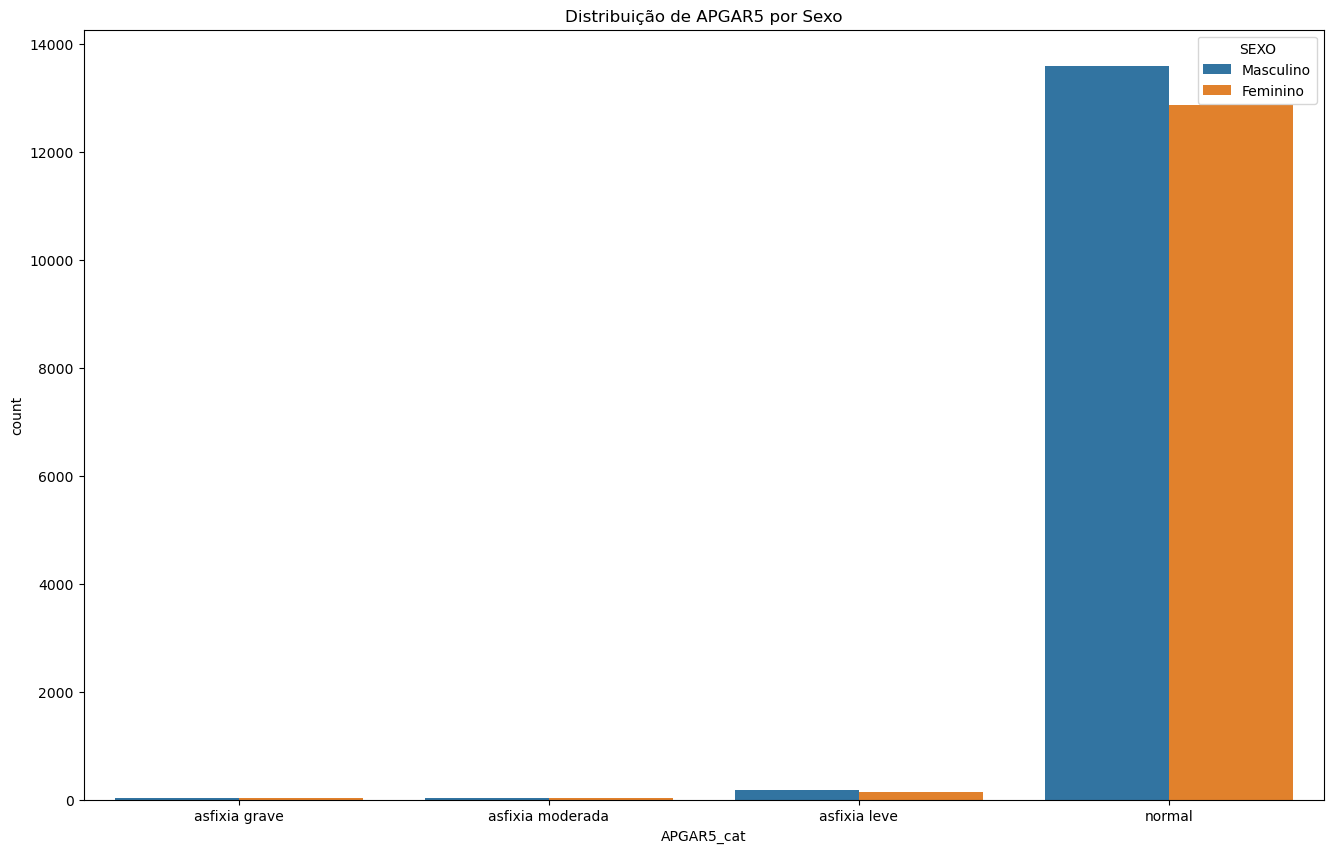

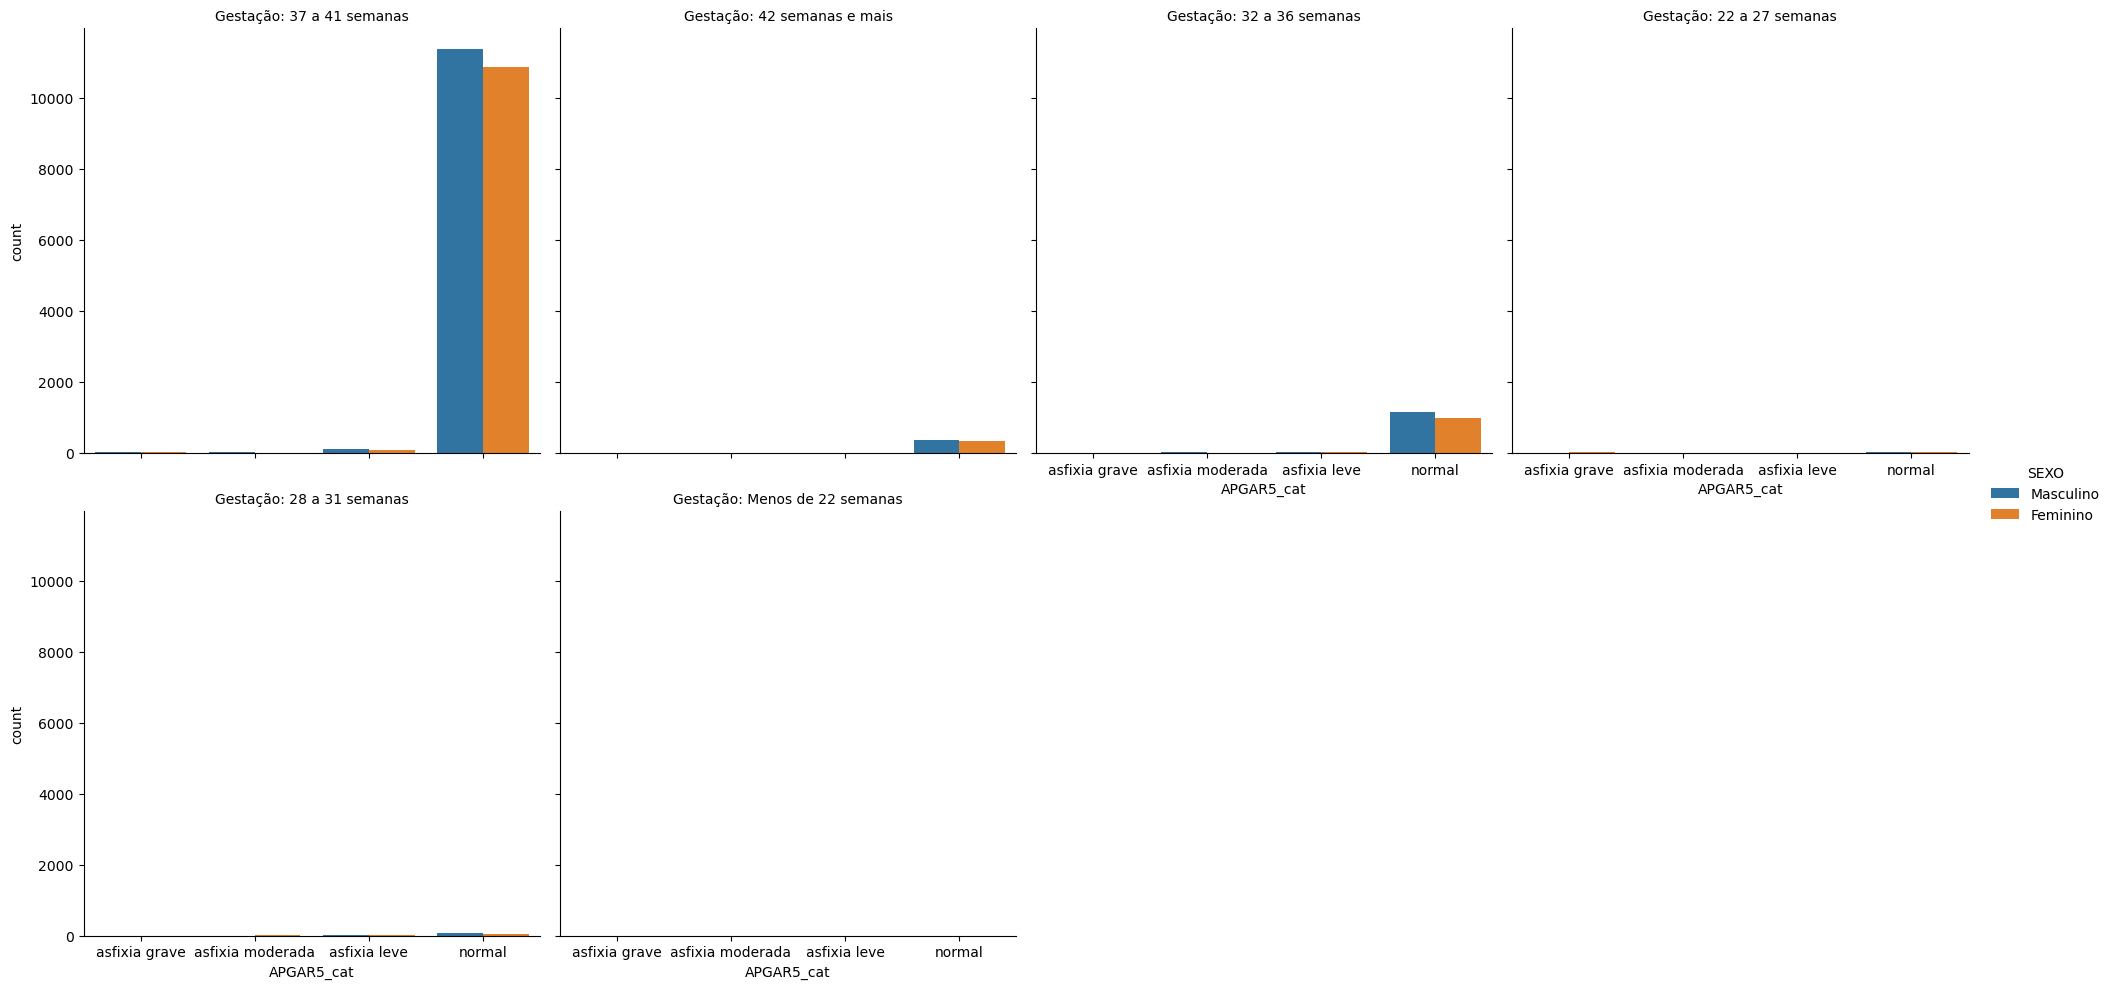

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.countplot(data=df, x='APGAR5_cat', hue='SEXO', order=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])
plt.title('Distribuição de APGAR5 por Sexo')
plt.show()

g = sns.catplot(data=df, x='APGAR5_cat', hue='SEXO', col='GESTACAO',
                kind='count', col_wrap=4,
                order=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])
g.set_titles('Gestação: {col_name}')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [15]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5_cat'])
print(tabela_cruzada)

APGAR5_cat           asfixia grave  asfixia leve  asfixia moderada  \
GESTACAO                                                             
22 a 27 semanas                 21            12                 1   
28 a 31 semanas                  3            18                12   
32 a 36 semanas                  8            73                19   
37 a 41 semanas                 33           196                28   
42 semanas e mais                1             6                 1   
Menos de 22 semanas              2             1                 0   

APGAR5_cat           desconhecido  normal  
GESTACAO                                   
22 a 27 semanas                 1      51  
28 a 31 semanas                 3     129  
32 a 36 semanas                15    2134  
37 a 41 semanas                66   22266  
42 semanas e mais               2     690  
Menos de 22 semanas             0       4  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [17]:
percentual_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100
print(percentual_linha)

APGAR5_cat           asfixia grave  asfixia leve  asfixia moderada  \
GESTACAO                                                             
22 a 27 semanas          24.418605     13.953488          1.162791   
28 a 31 semanas           1.818182     10.909091          7.272727   
32 a 36 semanas           0.355714      3.245887          0.844820   
37 a 41 semanas           0.146089      0.867679          0.123954   
42 semanas e mais         0.142857      0.857143          0.142857   
Menos de 22 semanas      28.571429     14.285714          0.000000   

APGAR5_cat           desconhecido     normal  
GESTACAO                                      
22 a 27 semanas          1.162791  59.302326  
28 a 31 semanas          1.818182  78.181818  
32 a 36 semanas          0.666963  94.886616  
37 a 41 semanas          0.292178  98.570100  
42 semanas e mais        0.285714  98.571429  
Menos de 22 semanas      0.000000  57.142857  


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

TypeError: '<' not supported between instances of 'str' and 'int'

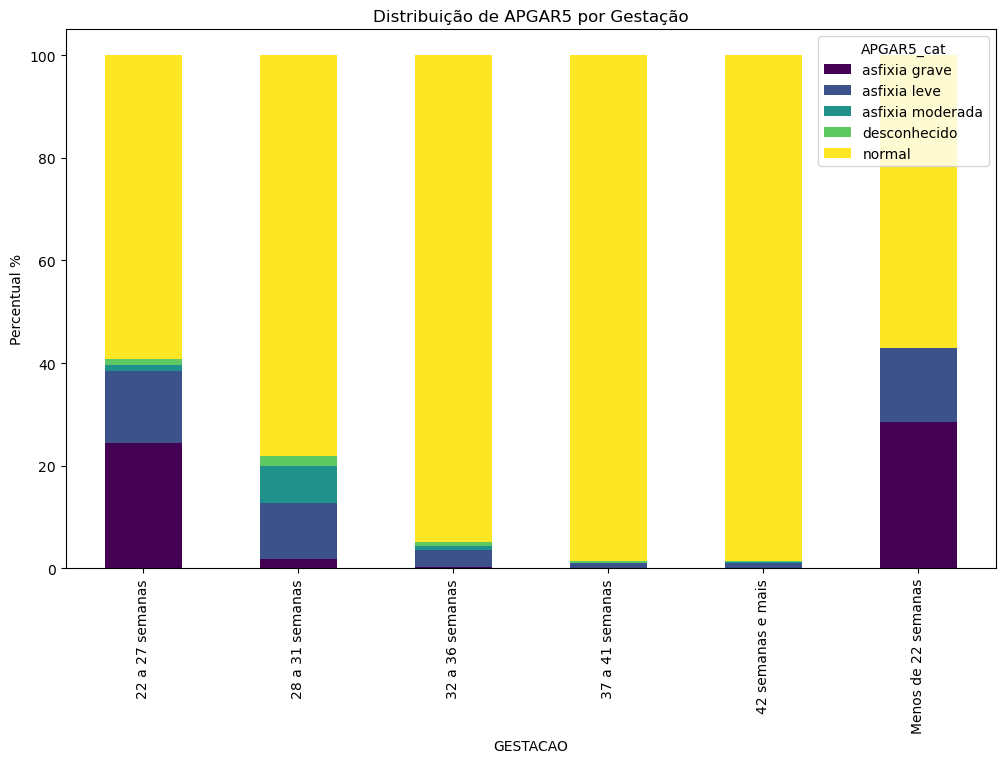

In [19]:
percentual_linha.plot(kind='bar', stacked=True, figsize=(12,7), colormap='viridis')
plt.ylabel('Percentual %')
plt.title('Distribuição de APGAR5 por Gestação')
plt.axvline(x= (df['GESTACAO'] < 37).sum() - 1, color='red', linestyle='--')  # opcional para marcar limite
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

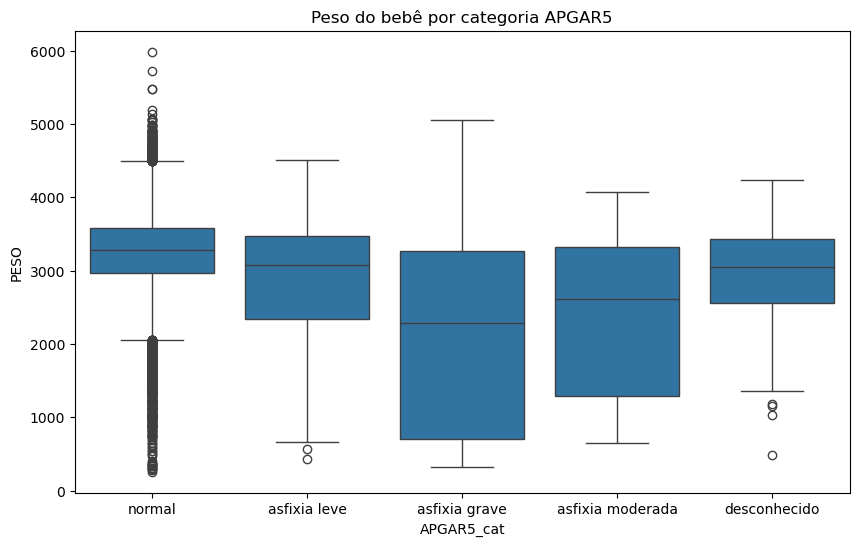

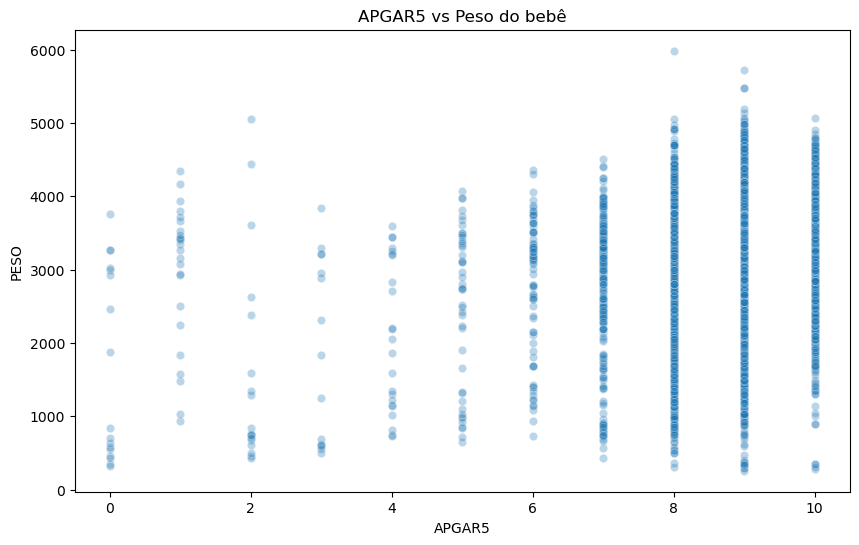

Correlação entre APGAR5 e PESO: 0.17


In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='APGAR5_cat', y='PESO')
plt.title('Peso do bebê por categoria APGAR5')
plt.show()

# Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='APGAR5', y='PESO', alpha=0.3)
plt.title('APGAR5 vs Peso do bebê')
plt.show()

# Correlação numérica (se APGAR5 é numérico)
correlation = df['APGAR5'].corr(df['PESO'])
print(f'Correlação entre APGAR5 e PESO: {correlation:.2f}')